# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [55]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf
from tqdm import tqdm
from tensorflow.python.ops.variables import Variable
import cv2

In [56]:
# TODO: fill this in based on where you saved the training and testing data
training_file = '../traffic-signs-data/train.p'
testing_file =  '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [57]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape

# TODO: number of testing examples
n_test = X_test.shape

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = np.max(y_train) + 1




print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (39209, 32, 32, 3)
Number of testing examples = (12630, 32, 32, 3)
Image data shape = (32, 32, 3)
Number of classes = 43


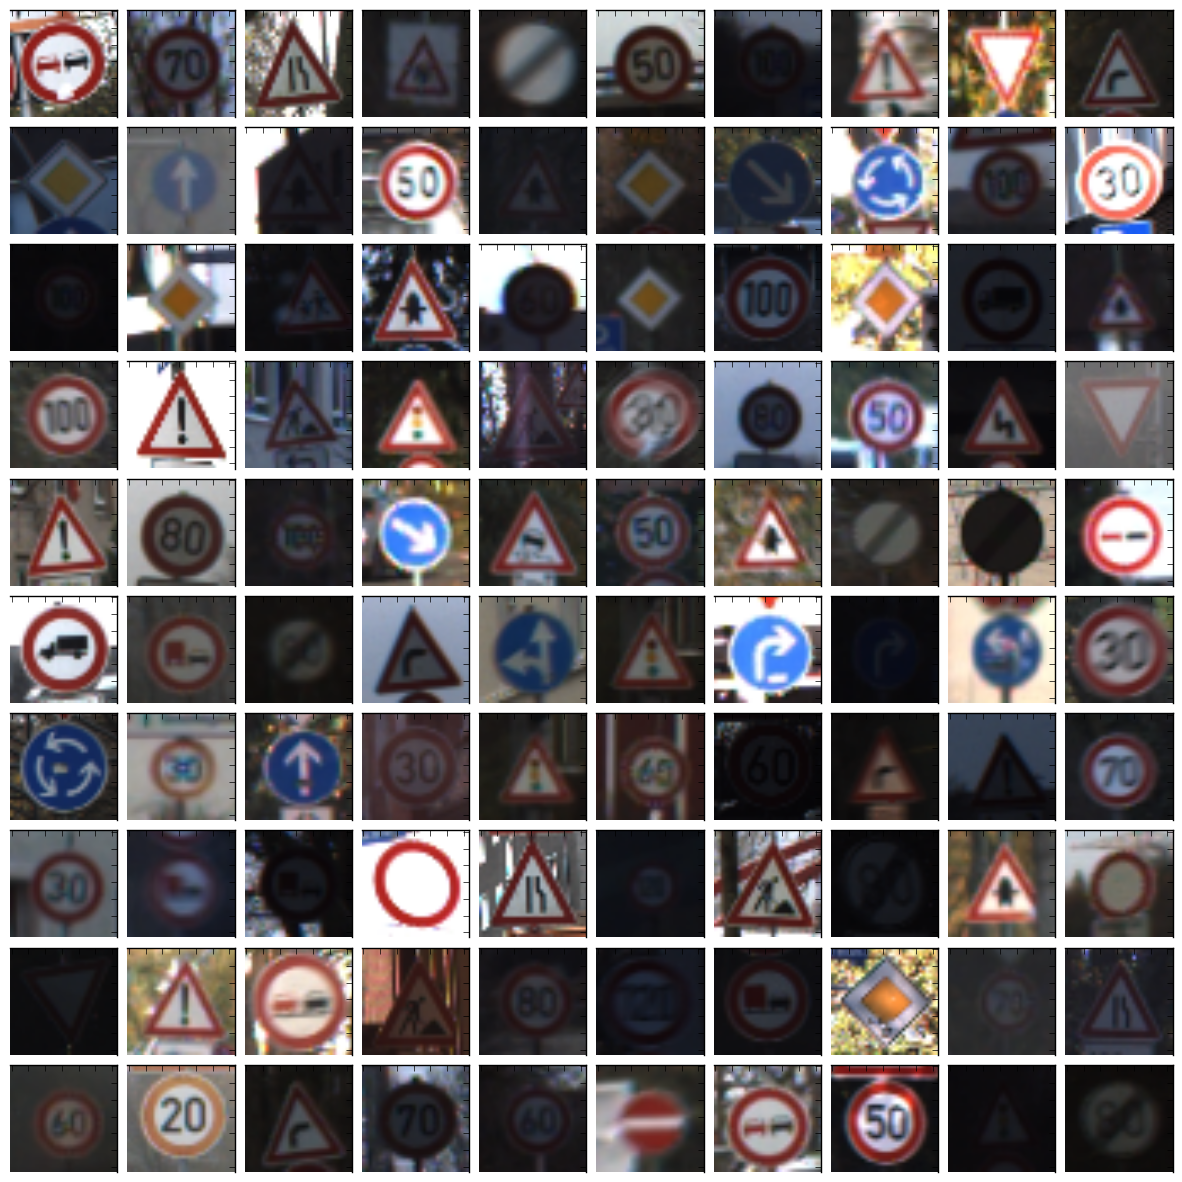

In [58]:
### Data visualization
def draw_sample(X=None , samples = 100):
    if X is not None:
        X_size = X.shape[0]
        mask = np.random.choice(X_size , samples ,replace = False)
        images = X[mask]
        fig = plt.figure(figsize = (15,15))
        grid = ImageGrid(fig, 111,
                         nrows_ncols = (int(np.sqrt(samples)+0.5), int(np.sqrt(samples)+0.5)),axes_pad=0.1)

        for i,img in enumerate(images):
            grid[i].imshow(img)  
            grid[i].axis["left"].set_visible(False)
            grid[i].axis["bottom"].set_visible(False)
    
        plt.show()

        
draw_sample(X_train)


## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [59]:
X_gray = np.zeros((n_train[0],n_train[1],n_train[2]))
X_gray_test = np.zeros((n_test[0],n_test[1],n_test[2]))
for i,img in enumerate(X_train):
    X_gray[i] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
X_train = X_gray

for i,img in enumerate(X_test):
    X_gray_test[i] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
X_test = X_gray_test
X_train = X_train[...,None]
X_test = X_test[...,None]
print("Shape of training set =", X_train.shape)
print("Shape of test set =", X_test.shape)

Shape of training set = (39209, 32, 32, 1)
Shape of test set = (12630, 32, 32, 1)


In [60]:
#Data preprocessing for convNet
mean = np.mean(X_train,axis = 0)
std = np.std(X_train,axis = 0) 
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### Question 1 

_Describe the techniques used to preprocess the data._



**Answer:** The two preprocessing step are data standardization(normalization) and conversion from RGB to grayscale.
The goal of normalization is to make all features of same scale which affects learning, an out-of scale features may make the learning process so difficult.The conversion of the RGB image to gray image was done by trial and error.I tried different models on color image and the results were mostly the same on gray images,so I chose to work with grayscale images to decrease the memory being used and make less computations.

In [61]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


In [62]:
### Data splitting.
n_valid = int(0.2*n_train[0])
validation_mask  = np.random.choice(n_train[0],n_valid,replace = False)
X_valid = X_train[validation_mask]
y_valid = y_train[validation_mask]
X_train = np.delete(X_train,validation_mask,0)
y_train = np.delete(y_train,validation_mask,0)
n_train = X_train.shape[0]
#X_train.astype(float)
#X_valid.astype(float)

In [63]:
print("Shape of training set =", X_train.shape)
print("Shape of validation set =", X_valid.shape)
print("Shape of Test set =", X_test.shape)



Shape of training set = (31368, 32, 32, 1)
Shape of validation set = (7841, 32, 32, 1)
Shape of Test set = (12630, 32, 32, 1)


In [65]:
train_labels = np.zeros((n_train,n_classes))
train_labels[range(n_train) , y_train] = 1.0
valid_labels = np.zeros((n_valid,n_classes))
valid_labels[range(n_valid) , y_valid] = 1.0
test_labels = np.zeros((n_test[0],n_classes))
test_labels[range(n_test[0]) , y_test] = 1.0


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** I randomly took 20% of the training data as my cross-validation set

In [74]:
def conv_relu(X,W,b,pad ="SAME",stride =1):
    conv = tf.nn.conv2d(X,W,[1,stride,stride,1],pad)
    conv = tf.nn.bias_add(conv,b)
    conv = tf.nn.relu(conv)
    return conv

def maxpool(X,filter_size=2,stride =2):
    return tf.nn.max_pool(X,[1,filter_size,filter_size,1],[1,stride,stride,1],padding ='SAME')

def CNN(X,weights,biases):

    conv1 = conv_relu(X,weights['layer_1'],biases['layer_1'])
    conv1 = tf.nn.dropout(conv1,conv_keep_prob)
    conv1 = maxpool(conv1,filter_size=2,stride=2)
    layer_1 = maxpool(conv1,filter_size=4,stride=4) 
    layer_1 = tf.reshape(layer_1 ,[tf.shape(X)[0],-1])
    layer_1 = tf.nn.dropout(layer_1,keep_prob)
    
    conv2 = conv_relu(conv1,weights['layer_2'],biases['layer_2'])
    conv2 = tf.nn.dropout(conv2,conv_keep_prob)
    conv2 = maxpool(conv2,filter_size=2,stride=2)
    
    #conv3 = conv_relu(conv2,weights['layer_3'],biases['layer_3'])
    #conv3= tf.nn.dropout(conv3,conv_keep_prob)
    #conv3 = maxpool(conv3,filter_size=2,stride=2)
    
    fc1 = tf.reshape(conv2,(-1,weights['fc1'].get_shape().as_list()[0]))
    fc1 = tf.add( tf.matmul(fc1,weights['fc1']) , biases['fc1'])
    #fc1 = tf.nn.relu(fc1)
    fc1 = tf.concat(1,[fc1,layer_1])
    fc1= tf.nn.dropout(fc1,keep_prob)
    out = tf.add(tf.matmul(fc1,weights['out']) , biases['out'])
    return out

features = tf.placeholder(tf.float32,name='features')
labels = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
conv_keep_prob = tf.placeholder(tf.float32)
mode_test ='Train'
train_feed_dict = {features : X_train , labels : train_labels , keep_prob : 1 , conv_keep_prob : 1 }
valid_feed_dict = {features : X_valid , labels : valid_labels,keep_prob : 1, conv_keep_prob : 1}
test_feed_dict = {features : X_test , labels: test_labels , keep_prob : 1 , conv_keep_prob : 1}


layer_width = {'layer_1' : 64 , 'layer_2' : 128 , 'fc1' : 512 }
weights = {'layer_1':tf.Variable(tf.truncated_normal((5,5,1,layer_width['layer_1']))),
                'layer_2':tf.Variable(tf.truncated_normal((5,5,layer_width['layer_1'],layer_width['layer_2']))),
                'fc1':tf.Variable(tf.truncated_normal((8*8*layer_width['layer_2'],layer_width['fc1']))),
                'out':tf.Variable(tf.truncated_normal((4*4*layer_width['layer_1']+layer_width['fc1'],n_classes)))}
biases = {'layer_1':tf.Variable(tf.zeros(layer_width['layer_1'])),
                'layer_2':tf.Variable(tf.zeros(layer_width['layer_2'])),
                'fc1':tf.Variable(tf.zeros(layer_width['fc1'])),
                'out':tf.Variable(tf.zeros(n_classes))}


saver = tf.train.Saver()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used a convolutional neural network based on the paper provided above.My Architecture is a 2-layer(64,128) convNet followed with a fully connected layer(512+1024 from layer 1).Both outputs of 1st and 2nd conv layers are concatenated and passed to the fully connected layer.The kernel size is selected to be 5X5(3x3 was tried but didn't perform well).All convolutions were with stride of 1 and SAME padding,therefore the number of features in each convolutional layer is "image_size*layer_width".The maxpooling filter is 2x2 filter with stride 2 for all conv layers and 4X4 filter with stride 4 on layer 1 features to be added to the FC layer

In [75]:
### Train your model here.
### Feel free to use as many code cells as needed.
#predictions = multiLayerNN(features , weights , biases)
predictions = CNN(features , weights , biases)
is_correct = tf.equal(tf.argmax(predictions,1) , tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
cost = tf.nn.softmax_cross_entropy_with_logits(predictions,labels)
regularization = 0
for k,v in weights.items():
    regularization += tf.nn.l2_loss(v)
reg = 1e-3
loss = tf.reduce_mean(cost) + reg*regularization

In [77]:
####################     Training            #############
learning_rate =2e-3
epochs = 100
batch_size = 100
batch_per_epoch = int(np.ceil(n_train/batch_size))
print_every = 5*batch_per_epoch
loss_history = []
training_acc_history =[]
validation_acc_history =[]

Solver = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as session:   
    session.run(init)
    iteration = 0   
    max_valid = 0
    
    for epoch in range(epochs):
        loss_hist = 0
        for batch in range(batch_per_epoch):
            mask = np.random.choice(n_train,batch_size,replace = False)
            batch_features = X_train[mask]
            batch_labels = train_labels[mask]
            _,loss_hist = session.run([Solver,loss],feed_dict = {features : batch_features, labels : batch_labels, keep_prob : 0.5 , conv_keep_prob :0.8})
            loss_history.append(loss_hist)
            if not iteration % print_every:
                print("Iteration :",iteration,'loss:',loss_history[-1],sep=" ")
            iteration += 1

        #per epoch
        #train_acc = session.run(accuracy , feed_dict = train_feed_dict) 
        #valid_acc = session.run(accuracy , feed_dict = valid_feed_dict)
        #test_acc =  session.run(accuracy , feed_dict = test_feed_dict)
        #training_acc_history.append(train_acc)
        valid_batch_size = 80
        batches = int(n_valid/valid_batch_size)
        sum_acc = 0
        for i in range(batches):
            start = i*valid_batch_size
            end = start + valid_batch_size
            valid_feed_dict1 = {features : X_valid[start:end] , labels: valid_labels[start:end] , keep_prob : 1 , conv_keep_prob : 1}
            valid_acc = session.run(is_correct , feed_dict = valid_feed_dict1)
            sum_acc += np.sum(valid_acc)
        valid_acc = sum_acc/n_valid
        validation_acc_history.append(valid_acc)
        if(valid_acc > max_valid):
            max_valid = valid_acc
            saver.save(session, '../models/model_temp')
        print("Epoch :",epoch,'Validation acc:',valid_acc,sep=" ")

    print('Model saved')

#     test_acc = session.run(accuracy , feed_dict = test_feed_dict)
#     print('Test Accuracy:',test_acc,sep =' ')


    

Iteration : 0 loss: 688833.0
Epoch : 0 Validation acc: 0.133528886622
Epoch : 1 Validation acc: 0.0997321770182
Epoch : 2 Validation acc: 0.143986736386
Epoch : 3 Validation acc: 0.174467542405
Epoch : 4 Validation acc: 0.207754112996
Iteration : 1570 loss: 2291.95
Epoch : 5 Validation acc: 0.225226374187
Epoch : 6 Validation acc: 0.252518811376
Epoch : 7 Validation acc: 0.272541767632
Epoch : 8 Validation acc: 0.283509756409
Epoch : 9 Validation acc: 0.294095140926
Iteration : 3140 loss: 1964.53
Epoch : 10 Validation acc: 0.311950006377
Epoch : 11 Validation acc: 0.341155464864
Epoch : 12 Validation acc: 0.338859839306
Epoch : 13 Validation acc: 0.34931768907
Epoch : 14 Validation acc: 0.354291544446
Iteration : 4710 loss: 1787.37
Epoch : 15 Validation acc: 0.364876928963
Epoch : 16 Validation acc: 0.376865195766
Epoch : 17 Validation acc: 0.39127662288
Epoch : 18 Validation acc: 0.38732304553
Epoch : 19 Validation acc: 0.390638949114
Iteration : 6280 loss: 1643.7
Epoch : 20 Validatio

In [78]:

with tf.Session() as session: 
    saver.restore(session,'../models/model_temp')
    batch_size = 80
    batches = int(n_test[0]/batch_size)
    sum_acc = 0
   
    valid_acc = session.run(accuracy , feed_dict = valid_feed_dict)
    for i in range(batches):
        start = i*batch_size
        end = start + batch_size
        test_feed_dict1 = {features : X_test[start:end] , labels: test_labels[start:end] , keep_prob : 1 , conv_keep_prob : 1}
        test_acc = session.run(is_correct , feed_dict = test_feed_dict1)
        sum_acc += np.sum(test_acc)
    test_acc = sum_acc/n_test[0]

print('Validation Accuracy: ' ,valid_acc)
print('Test Accuracy: ' ,test_acc)


    

Validation Accuracy:  0.986354
Test Accuracy:  0.925811559778


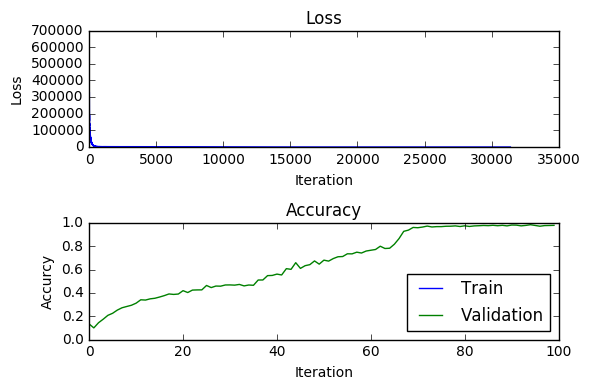

In [79]:
#Draw loss history
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(loss_history)
loss_plot.set_xlabel('Iteration')
loss_plot.set_ylabel('Loss')

acc_plot = plt.subplot(2,1,2)
acc_plot.set_title('Accuracy')
acc_plot.plot(training_acc_history, label ='Train')
acc_plot.plot(validation_acc_history, label ='Validation')
acc_plot.set_xlabel('Iteration')
acc_plot.set_ylabel('Accurcy')
plt.tight_layout()
acc_plot.legend(loc=4)
plt.show()


##### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used Adam optimizer with batch size 100.I trained the model with 100 epochs and I had 2 hyperparameters which are the learning rate and the regularization strength. I manually tried different values for learning rate, regularization,batch_size and number of epochs.The batch size and number of epochs of (100,100) were satisfactory and I tried alot of combinations of learning rate and regularization stregnth and then I chose the numbers which gave best validation accuracy

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
First I used a simple linear model with softmax loss to see how will convNets increase the performance.I reached 75 % accuracy with a linear classifier.After that I tried a multi-layer neural network with 2 and 3 hidden layers and surprisingly int performed worse than the single linear classifier,I tried multiple configurations with neural nets but were all in vein.So I started to work with convNets.First of all I implemented my own Architecture which was a 3 layer convNet followed by 2 fully connected layers,the network was performing perfect on the validatin set but there was a 20% difference in accuracy between the validation and test set which was probably due to overfitting.The last trial was to implement the architecture of the paper mentioned above and it achieved the best test accuracy exceeding 91%.The actual training steps for choosing the hyper-parameters are mentioned in question 4

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

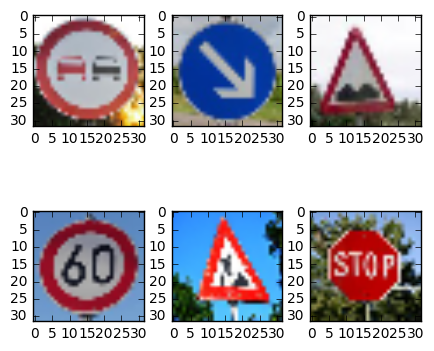

In [85]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
import matplotlib.gridspec as gridspec
import csv


images_paths = listdir('./images')
test_images = None
for path in images_paths:
    if not path.endswith('.jpg'):
        images_paths.remove(path)
gs1 = gridspec.GridSpec(2,3)
gs1.update(wspace=0.25, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(5,5))
i=0
for path in images_paths:
    test_img = plt.imread('./images/'+ path)
    ax = plt.subplot(gs1[i])
    i +=1
    test_img =cv2.resize(test_img, (32,32))
    ax.imshow(test_img)
    gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    gray = gray[None,...,None]
    test_img = (gray-mean)/std
    if(test_images is None):
        test_images = test_img
    else:
        test_images = np.concatenate((test_images,test_img),0)

plt.show()

    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
The Convolutional neural network is not so invariant to transformation of images (rotation,scaling,translation),so if a new image is captured from different angle than that in the dataset it would be difficult to classify.Also,traffic signs which have few examples in the training set or not present at all may be difficult to classify, such as local traffic signs.

In [86]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    saver.restore(session,'../models/model_temp')
    pred = session.run(predictions,feed_dict = {features : test_images, keep_prob : 1,conv_keep_prob :1})
labels = np.argmax(pred , axis = 1)
for i,path in enumerate(images_paths):
    ifile  = open('signnames.csv', "r")
    reader = csv.reader(ifile)
    for row in reader:
        if row[0] == str(labels[i]):
            print(path , 'is classified as:',row[1],sep = ' ')
    ifile.close()

NoPassing.jpg is classified as: No passing
right.jpg is classified as: Keep right
bumpy.jpg is classified as: Bicycles crossing
speed60.jpg is classified as: Speed limit (50km/h)
workingArea.jpg is classified as: Road work
stop.jpg is classified as: Stop


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
The model predicts correctly 4 images from the internet out of 6 images

the softmax probabilities are as shown
 [ 0.95320988  1.          0.99995232  0.94033825  0.69523782  0.99861991]


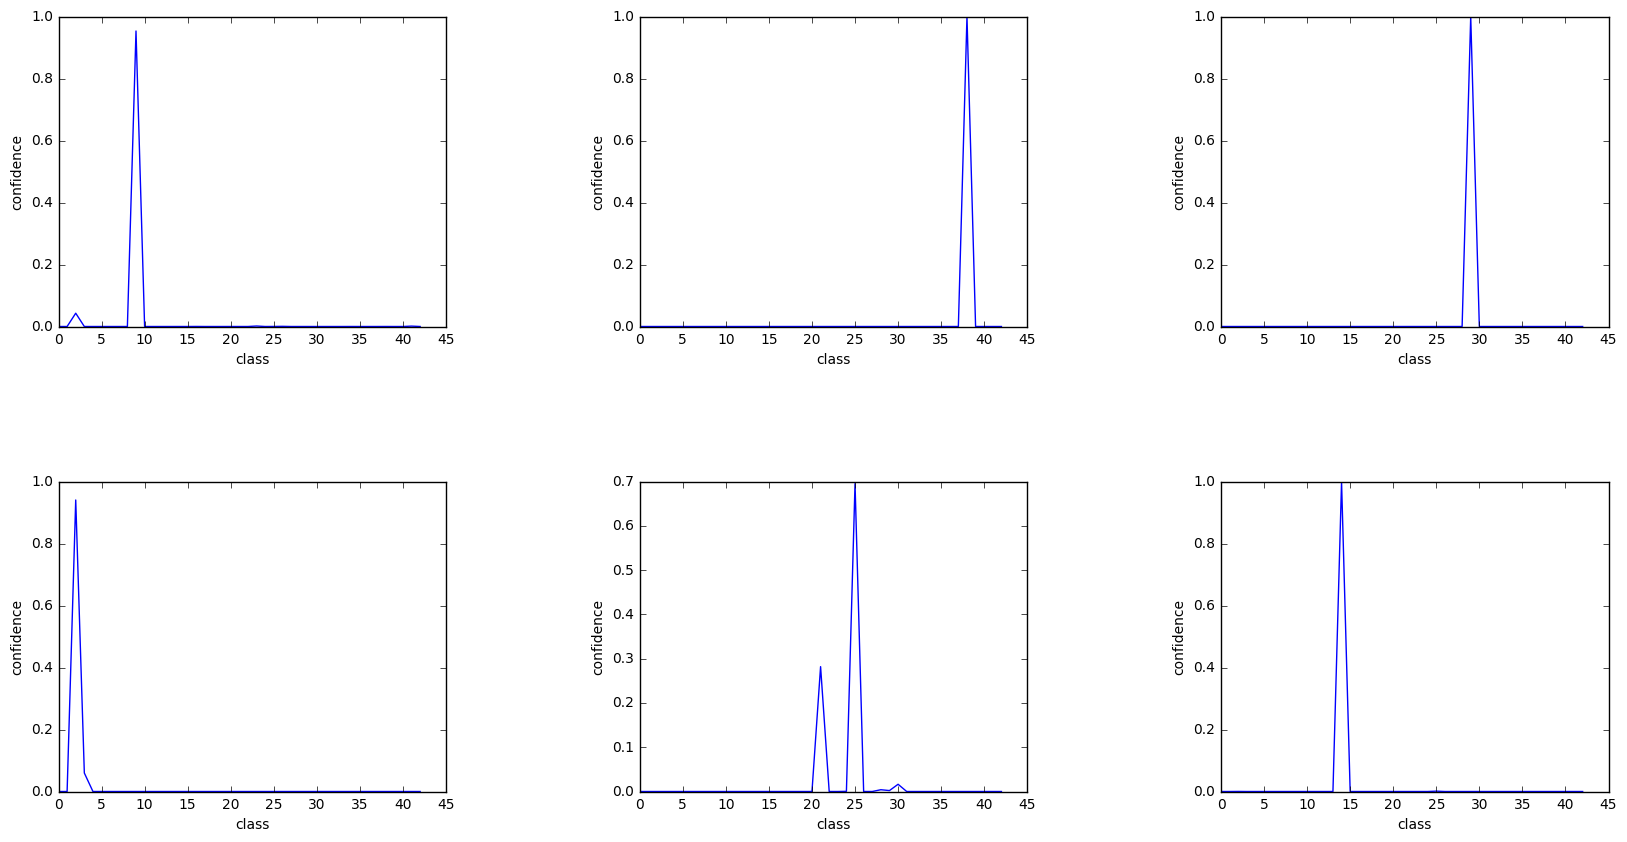

In [152]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
prob = tf.nn.softmax(predictions)
top_5= tf.nn.top_k(prob,k=5)
with tf.Session() as session:
    saver.restore(session,'../models/model_temp')
    c_prob,top_k_prob = session.run([prob,top_5],feed_dict = {features:test_images,keep_prob:1,conv_keep_prob:1})
print('the softmax probabilities are as shown\n',np.max(c_prob,1))
gs1 = gridspec.GridSpec(2,3)
gs1.update(wspace=0.5, hspace=0.5) # set the spacing between axes. 
plt.figure(figsize=(20,10))
for i in range(c_prob.shape[0]):
    ax = plt.subplot(gs1[i])
    ax.plot(c_prob[i])
    ax.set_ylabel('confidence')
    ax.set_xlabel('class')
plt.show()
_,idxs = top_k_prob

In [145]:
#print top_5_probabilities for the 2 images classified incorrectly (3rd and forth)
indx3 = idxs[2]  #3rd img top_5
indx4 = idxs[3]  #4th img top_5
l = []

for i in range(indx3.shape[0]):
    ifile  = open('signnames.csv', "r")
    reader = csv.reader(ifile)
    for row in reader:
        if row[0] == str(indx3[i]):
            l.append(row[1])
    ifile.close()
print('Top 5 classes for 1st image classified wrong are\n',l)
l = []
for i in range(indx4.shape[0]):
    ifile  = open('signnames.csv', "r")
    reader = csv.reader(ifile)
    for row in reader:
        if row[0] == str(indx4[i]):
            l.append(row[1])
    ifile.close()
print('Top 5 classes for 2nd image classified wrong are\n',l)

Top 5 classes for 1st image classified wrong are
 ['Bicycles crossing', 'Bumpy road', 'Speed limit (20km/h)', 'Wild animals crossing', 'Slippery road']
Top 5 classes for 2nd image classified wrong are
 ['Speed limit (50km/h)', 'Speed limit (60km/h)', 'Stop', 'Road work', 'Slippery road']


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
The model is correct in 3 samples with very high confidence,the 5th sample is classified correctly but with low confidence which is 0.69.The 3rd and 4th samples are classified wrong but the correct class is the 2nd in the top_5_probabilites.The new images test accuracy was 66.6 % compared to test data accuracy 92 %,but actually 6 images are not sufficient to determine the accuracy

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.